# ***Data Based Decisions - Final Project***
### Yonatan Sasson - 207600495

➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

# **Bayesian Modeling of the Inverted U-Curve: Assertiveness and Leadership**

## Abstract

This notebook demonstrates the application of Bayesian statistical modeling to understand the inverted U-shaped relationship between assertiveness and leadership effectiveness. We examine how two competing processes - instrumental outcomes and social outcomes - combine to create the characteristic inverted U-curve pattern commonly observed in psychology and social sciences.

➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 1. Introduction and Theoretical Background

### The Inverted U Phenomenon

The inverted U-curve is a fundamental pattern in psychology where an initially beneficial factor becomes detrimental beyond an optimal point. In the context of leadership and assertiveness:

- **Low Assertiveness**: Leaders may be seen as too passive, failing to achieve instrumental goals
- **High Assertiveness**: Leaders may be seen as too aggressive, damaging social relationships
- **Moderate Assertiveness**: Optimal balance between goal achievement and social harmony

### Dual Process Model

We propose that leadership effectiveness results from two competing processes:

1. **Instrumental Process**: Assertiveness → Increased goal achievement → Better leadership perception
2. **Social Process**: Assertiveness → Decreased social harmony → Worse leadership perception

The combination of these processes creates the inverted U-shape where moderate assertiveness maximizes overall leadership effectiveness.


➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 2. Data Loading and Initial Exploration

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
from scipy import stats

In [ ]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


In [ ]:
# Load the data
instrumental_data = pd.read_csv('instrumental_points.csv', header=None, names=['assertiveness', 'outcome'])
social_data = pd.read_csv('social_points.csv', header=None, names=['assertiveness', 'outcome'])

print(f"Instrumental data shape: {instrumental_data.shape}")
print(f"Social data shape: {social_data.shape}")

# Display first few rows
print("\nInstrumental Data (first 5 rows):")
print(instrumental_data.head())
print("\nSocial Data (first 5 rows):")
print(social_data.head())


Instrumental data shape: (200, 2)
Social data shape: (200, 2)

Instrumental Data (first 5 rows):
   assertiveness   outcome
0       2.699422  3.739726
1       2.774566  3.849315
2       2.791908  3.876712
3       2.820809  3.904110
4       2.867052  3.938356

Social Data (first 5 rows):
   assertiveness   outcome
0       2.231214  4.527397
1       2.508671  4.726027
2       2.745665  4.842466
3       2.872832  4.883562
4       2.745665  4.815068


In [ ]:
# Basic statistics
print("DATA SUMMARY:")
print("\nInstrumental Outcomes:")
print(instrumental_data.describe())
print("\nSocial Outcomes:")
print(social_data.describe())


DATA SUMMARY:

Instrumental Outcomes:
       assertiveness     outcome
count     200.000000  200.000000
mean        4.516734    4.827192
std         1.300892    0.630588
min         2.173410    3.260274
25%         3.382948    4.301370
50%         4.442197    4.952055
75%         5.608382    5.414384
max         6.849711    5.616438

Social Outcomes:
       assertiveness     outcome
count     200.000000  200.000000
mean        4.771445    4.663733
std         1.444993    0.442605
min         2.173410    2.527397
25%         3.521676    4.409247
50%         4.815029    4.777397
75%         6.027457    5.022260
max         7.034682    5.589041


➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 3. Data Visualization: Understanding the Dual Processes


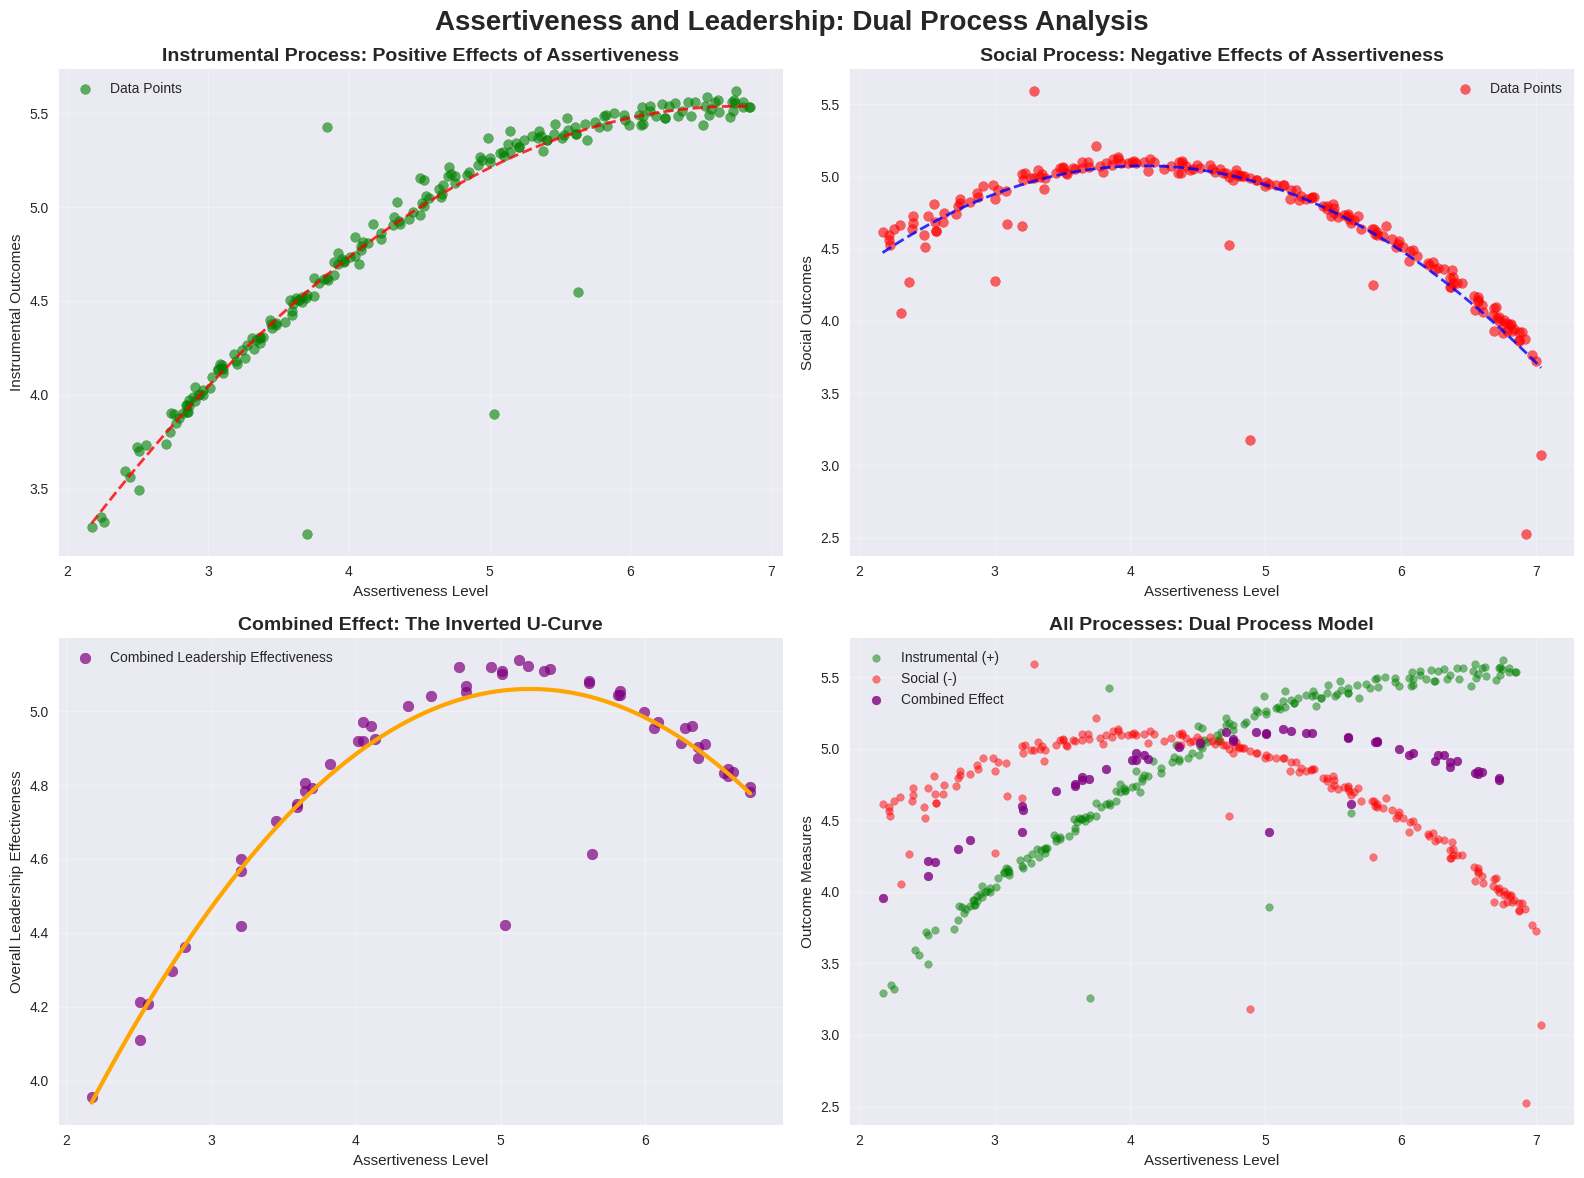


=== OPTIMAL ASSERTIVENESS ANALYSIS ===
Optimal Assertiveness Level: 5.13
Maximum Leadership Effectiveness: 5.14


In [ ]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Assertiveness and Leadership: Dual Process Analysis', fontsize=20, fontweight='bold')

# Plot 1: Instrumental Process
axes[0, 0].scatter(instrumental_data['assertiveness'], instrumental_data['outcome'],
                   alpha=0.6, color='green', s=50, label='Data Points')
axes[0, 0].set_title('Instrumental Process: Positive Effects of Assertiveness', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Assertiveness Level')
axes[0, 0].set_ylabel('Instrumental Outcomes')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Add trend line for instrumental
z = np.polyfit(instrumental_data['assertiveness'], instrumental_data['outcome'], 2)
p = np.poly1d(z)
x_smooth = np.linspace(instrumental_data['assertiveness'].min(), instrumental_data['assertiveness'].max(), 100)
axes[0, 0].plot(x_smooth, p(x_smooth), "r--", alpha=0.8, linewidth=2, label='Trend')

# Plot 2: Social Process
axes[0, 1].scatter(social_data['assertiveness'], social_data['outcome'],
                   alpha=0.6, color='red', s=50, label='Data Points')
axes[0, 1].set_title('Social Process: Negative Effects of Assertiveness', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Assertiveness Level')
axes[0, 1].set_ylabel('Social Outcomes')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Add trend line for social
z2 = np.polyfit(social_data['assertiveness'], social_data['outcome'], 2)
p2 = np.poly1d(z2)
x_smooth2 = np.linspace(social_data['assertiveness'].min(), social_data['assertiveness'].max(), 100)
axes[0, 1].plot(x_smooth2, p2(x_smooth2), "b--", alpha=0.8, linewidth=2, label='Trend')

# Plot 3: Combined Effect (Inverted U)
# Create combined data by aligning on assertiveness levels
combined_data = pd.merge(instrumental_data, social_data, on='assertiveness', suffixes=('_inst', '_soc'))
combined_data['combined_outcome'] = combined_data['outcome_inst'] * 0.5 + combined_data['outcome_soc'] * 0.5

axes[1, 0].scatter(combined_data['assertiveness'], combined_data['combined_outcome'],
                   alpha=0.7, color='purple', s=60, label='Combined Leadership Effectiveness')
axes[1, 0].set_title('Combined Effect: The Inverted U-Curve', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Assertiveness Level')
axes[1, 0].set_ylabel('Overall Leadership Effectiveness')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Add inverted U trend
z3 = np.polyfit(combined_data['assertiveness'], combined_data['combined_outcome'], 2)
p3 = np.poly1d(z3)
x_smooth3 = np.linspace(combined_data['assertiveness'].min(), combined_data['assertiveness'].max(), 100)
axes[1, 0].plot(x_smooth3, p3(x_smooth3), "orange", linewidth=3, label='Inverted U Trend')

# Plot 4: All processes together
axes[1, 1].scatter(instrumental_data['assertiveness'], instrumental_data['outcome'],
                   alpha=0.5, color='green', s=30, label='Instrumental (+)')
axes[1, 1].scatter(social_data['assertiveness'], social_data['outcome'],
                   alpha=0.5, color='red', s=30, label='Social (-)')
axes[1, 1].scatter(combined_data['assertiveness'], combined_data['combined_outcome'],
                   alpha=0.8, color='purple', s=40, label='Combined Effect')
axes[1, 1].set_title('All Processes: Dual Process Model', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Assertiveness Level')
axes[1, 1].set_ylabel('Outcome Measures')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Find optimal assertiveness level
optimal_idx = combined_data['combined_outcome'].idxmax()
optimal_assertiveness = combined_data.loc[optimal_idx, 'assertiveness']
optimal_effectiveness = combined_data.loc[optimal_idx, 'combined_outcome']

print(f"\n=== OPTIMAL ASSERTIVENESS ANALYSIS ===")
print(f"Optimal Assertiveness Level: {optimal_assertiveness:.2f}")
print(f"Maximum Leadership Effectiveness: {optimal_effectiveness:.2f}")


➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 4. Theoretical Model Specification

### Mathematical Formulation

We model the leadership effectiveness as a combination of two processes:

**Instrumental Process:**
$$Y_{instrumental} = \alpha_1 + \beta_1 \cdot Assertiveness + \epsilon_1$$

**Social Process:**
$$Y_{social} = \alpha_2 + \beta_2 \cdot Assertiveness + \gamma \cdot Assertiveness^2 + \epsilon_2$$

**Combined Leadership Effectiveness:**
$$Y_{leadership} = w_1 \cdot Y_{instrumental} + w_2 \cdot Y_{social}$$

Where:
- $\alpha_i$ are intercepts
- $\beta_i$ are linear coefficients
- $\gamma$ captures the quadratic decline in social outcomes
- $w_i$ are weights for each process
- $\epsilon_i$ are error terms

**Note:**

We chose a second-degree (quadratic) function to model the social outcomes of assertiveness because the relationship appears to follow a rise-then-fall pattern. At very low levels of assertiveness, individuals may come across as overly passive or withdrawn, which can lead to weaker social connections. As assertiveness increases, people tend to express themselves more and engage better with others, often improving how they are perceived socially. However, beyond a certain point, excessive assertiveness can become overbearing or aggressive, leading to social rejection or dislike.


➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 5. Prior Specification and Justification

Before observing our data, we establish prior beliefs based on theoretical expectations:


Prior Predictive Simulation:

Instrumental Process (Linear model):
- Intercept (α₁): Normal(2, 1)
- Slope (β₁): Normal(0.5, 0.2)
- Noise (σ₁): HalfNormal(0.3)

Social Process (Quadratic):
- Intercept (α₂): Normal(4.5, 1)
- Linear term (β₂): Normal(0.6, 0.1) - positive initial slope
- Quadratic term (γ): Normal(-0.07, 0.02)
- Noise (σ₂): HalfNormal(0.3)

VERIFICATION:
Expected social peak at x ≈ 4.2


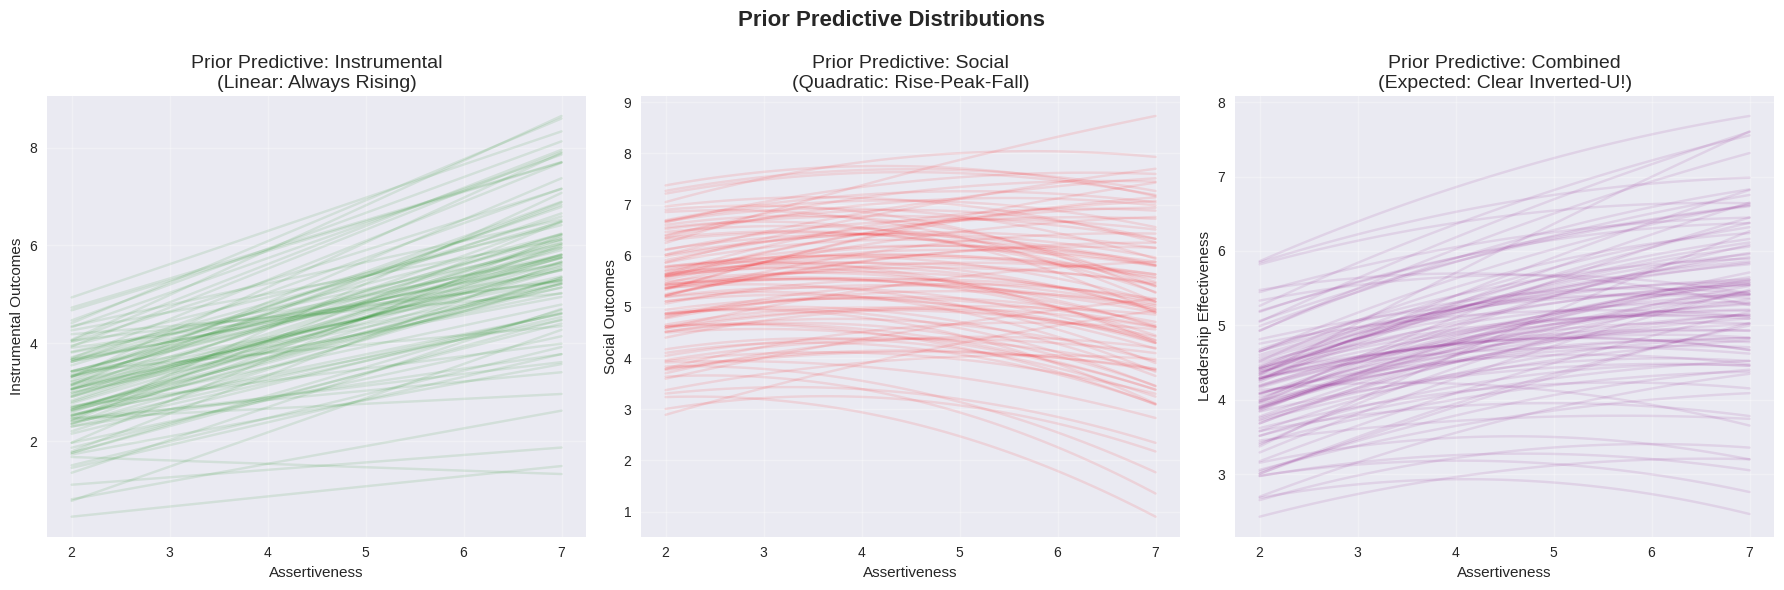

In [ ]:
# Prior Predictive Simulation

print("Prior Predictive Simulation:")

print("\nInstrumental Process (Linear model):")
print("- Intercept (α₁): Normal(2, 1)")
print("- Slope (β₁): Normal(0.5, 0.2)")
print("- Noise (σ₁): HalfNormal(0.3)")

print("\nSocial Process (Quadratic):")
print("- Intercept (α₂): Normal(4.5, 1)")
print("- Linear term (β₂): Normal(0.6, 0.1) - positive initial slope")
print("- Quadratic term (γ): Normal(-0.07, 0.02)")
print("- Noise (σ₂): HalfNormal(0.3)")

# Set parameters
np.random.seed(42)
n_prior_samples = 1000
x_range = np.linspace(2, 7, 50)

# Prior samples for instrumental process
alpha1_prior = np.random.normal(2, 1, n_prior_samples)
beta1_prior = np.random.normal(0.5, 0.2, n_prior_samples)
sigma1_prior = np.abs(np.random.normal(0, 0.3, n_prior_samples))

# Prior samples for social process
alpha2_prior = np.random.normal(4.5, 1, n_prior_samples)
beta2_prior = np.random.normal(0.6, 0.1, n_prior_samples)
gamma_prior = np.random.normal(-0.07, 0.02, n_prior_samples)
sigma2_prior = np.abs(np.random.normal(0, 0.3, n_prior_samples))

# Verify peak locations
mean_peak = -np.mean(beta2_prior) / (2 * np.mean(gamma_prior))
print(f"\nVERIFICATION:")
print(f"Expected social peak at x ≈ {mean_peak:.1f}")

# Generate plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Instrumental
for i in range(100):
    y_inst = alpha1_prior[i] + beta1_prior[i] * x_range
    axes[0].plot(x_range, y_inst, alpha=0.1, color='green')

axes[0].set_title('Prior Predictive: Instrumental\n(Linear: Always Rising)', fontsize=14)
axes[0].set_xlabel('Assertiveness')
axes[0].set_ylabel('Instrumental Outcomes')
axes[0].grid(True, alpha=0.3)

# Plot 2: Social
for i in range(100):
    y_soc = alpha2_prior[i] + beta2_prior[i] * x_range + gamma_prior[i] * x_range**2
    axes[1].plot(x_range, y_soc, alpha=0.1, color='red')

axes[1].set_title('Prior Predictive: Social\n(Quadratic: Rise-Peak-Fall)', fontsize=14)
axes[1].set_xlabel('Assertiveness')
axes[1].set_ylabel('Social Outcomes')
axes[1].grid(True, alpha=0.3)

# Plot 3: Combined
for i in range(100):
    y_inst = alpha1_prior[i] + beta1_prior[i] * x_range
    y_soc = alpha2_prior[i] + beta2_prior[i] * x_range + gamma_prior[i] * x_range**2
    y_combined = 0.5 * y_inst + 0.5 * y_soc
    axes[2].plot(x_range, y_combined, alpha=0.1, color='purple')

axes[2].set_title('Prior Predictive: Combined\n(Expected: Clear Inverted-U!)', fontsize=14)
axes[2].set_xlabel('Assertiveness')
axes[2].set_ylabel('Leadership Effectiveness')
axes[2].grid(True, alpha=0.3)

plt.suptitle('Prior Predictive Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


**Note:**

While the priors provide a rough guideline based on theoretical expectations, the Bayesian model will infer the true relationships directly from the observed data.

➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 6. Bayesian Model Implementation

Now we implement our Bayesian model using PyMC to estimate the parameters of both processes:


In [ ]:
# Prepare data for modeling
X_inst = instrumental_data['assertiveness'].values
y_inst = instrumental_data['outcome'].values
X_soc = social_data['assertiveness'].values
y_soc = social_data['outcome'].values

with pm.Model() as dual_process_model:

    # INSTRUMENTAL PROCESS (Linear)
    # Priors for instrumental process
    alpha1 = pm.Normal('alpha1_inst', mu=2, sigma=1)
    beta1 = pm.Normal('beta1_inst', mu=0.5, sigma=0.2)
    sigma1 = pm.HalfNormal('sigma1_inst', sigma=0.3)

    # Linear relationship for instrumental outcomes
    mu_inst = alpha1 + beta1 * X_inst

    # Likelihood for instrumental data
    y_inst_obs = pm.Normal('y_inst_obs', mu=mu_inst, sigma=sigma1, observed=y_inst)

    # SOCIAL PROCESS (Quadratic)
    # Priors for social process
    alpha2 = pm.Normal('alpha2_soc', mu=4.5, sigma=1)
    beta2 = pm.Normal('beta2_soc', mu=0.6, sigma=0.1)
    gamma = pm.Normal('gamma_soc', mu=-0.07, sigma=0.02)
    sigma2 = pm.HalfNormal('sigma2_soc', sigma=0.3)

    # Quadratic relationship for social outcomes
    mu_soc = alpha2 + beta2 * X_soc + gamma * X_soc**2

    # Likelihood for social data
    y_soc_obs = pm.Normal('y_soc_obs', mu=mu_soc, sigma=sigma2, observed=y_soc)

    # COMBINED EFFECTIVENESS
    # Weight parameters for combining processes
    w1 = pm.Beta('weight_inst', alpha=2, beta=2)  # Weight for instrumental
    w2 = pm.Deterministic('weight_soc', 1 - w1)   # Weight for social (complementary)

    # Predicted combined effectiveness over a range
    X_pred = pm.Data('X_pred', np.linspace(2, 7, 100))
    mu_inst_pred = alpha1 + beta1 * X_pred
    mu_soc_pred = alpha2 + beta2 * X_pred + gamma * X_pred**2

    # Combined prediction
    mu_combined = pm.Deterministic('mu_combined', w1 * mu_inst_pred + w2 * mu_soc_pred)

#### ***About the weights***
In this model, we assume that **overall leadership effectiveness** is determined by a combination of two separate processes:
- **Instrumental outcomes** (goal achievement)
- **Social outcomes** (interpersonal harmony)

However, we don't know ahead of time **how much weight** each process contributes to leadership perception. To account for this uncertainty, we let the model **learn the optimal balance** from the data itself.

w1 is sampled from a Beta distribution between 0 and 1. The choice of Beta(2, 2) reflects a neutral prior belief (centered around 0.5) — meaning we initially assume both processes might be equally important.

w2 is automatically set as 1 - w1 to ensure the total weight always sums to 1.

This allows the model to flexibly learn, based on the observed data, whether leadership effectiveness is more influenced by performance (instrumental) or social perception (social).

**Example:**
If the model finds that w1 = 0.7, then it gives 70% of the importance to instrumental outcomes and 30% to social outcomes.
If instead w1 = 0.3, then it values social perception more.

This approach ensures a principled and interpretable way to model how competing processes contribute to a complex outcome like leadership.

➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 7. MCMC Sampling and Posterior Inference

We performed Markov Chain Monte Carlo (MCMC) sampling using 4 chains and 2000 draws per chain (with 1000 tuning steps). This process estimates the posterior distributions of all model parameters based on the observed data. We also generated samples from the posterior predictive distribution to assess the model’s ability to reproduce observed outcomes. These samples are used later for inference and model validation.


In [ ]:
# Sample from the posterior
print("Starting MCMC sampling:")

with dual_process_model:
    # Sample from posterior
    trace = pm.sample(
        draws=2000,
        tune=1000,
        chains=4,
        cores=4,
        random_seed=42,
        return_inferencedata=True,
    )

    # Sample from posterior predictive
    ppc = pm.sample_posterior_predictive(trace, random_seed=42)

print(f"Trace summary:")
print(f"- {trace.posterior.dims['draw']} draws per chain")
print(f"- {trace.posterior.dims['chain']} chains")
print(f"- Total samples: {trace.posterior.dims['draw'] * trace.posterior.dims['chain']}")

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:01

Trace summary:
- 2000 draws per chain
- 4 chains
- Total samples: 8000


/tmp/ipython-input-2039712907.py:19: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"- {trace.posterior.dims['draw']} draws per chain")
/tmp/ipython-input-2039712907.py:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"- {trace.posterior.dims['chain']} chains")
/tmp/ipython-input-2039712907.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"- Total samples: {trace.pos

In [ ]:
# Calculate optimal assertiveness from posterior samples
print("\nCalculating optimal assertiveness from posterior:")

# Extract posterior samples for the combined effectiveness
posterior_combined = trace.posterior['mu_combined']  # Shape: (chains, draws, X_pred_points)

# For each posterior sample, find the optimal assertiveness level
optimal_indices = np.argmax(posterior_combined.values, axis=-1)  # Shape: (chains, draws)

# Convert indices to actual assertiveness values
X_pred = np.linspace(2, 7, 100)  # Same as used in model
optimal_assertiveness_samples = X_pred[optimal_indices.flatten()]

# Calculate maximum effectiveness for each sample
max_effectiveness_samples = np.max(posterior_combined.values, axis=-1).flatten()

# Summary statistics
optimal_assertiveness_mean = np.mean(optimal_assertiveness_samples)
optimal_assertiveness_std = np.std(optimal_assertiveness_samples)
optimal_assertiveness_ci = np.percentile(optimal_assertiveness_samples, [2.5, 97.5])

max_effectiveness_mean = np.mean(max_effectiveness_samples)
max_effectiveness_ci = np.percentile(max_effectiveness_samples, [2.5, 97.5])

print(f"\nOPTIMAL ASSERTIVENESS RESULTS:")
print(f"Optimal Assertiveness: {optimal_assertiveness_mean:.3f} ± {optimal_assertiveness_std:.3f}")
print(f"95% Credible Interval: [{optimal_assertiveness_ci[0]:.3f}, {optimal_assertiveness_ci[1]:.3f}]")
print(f"Maximum Effectiveness: {max_effectiveness_mean:.3f}")
print(f"95% Credible Interval: [{max_effectiveness_ci[0]:.3f}, {max_effectiveness_ci[1]:.3f}]")


Calculating optimal assertiveness from posterior:

OPTIMAL ASSERTIVENESS RESULTS:
Optimal Assertiveness: 5.767 ± 1.044
95% Credible Interval: [4.121, 7.000]
Maximum Effectiveness: 5.122
95% Credible Interval: [4.918, 5.745]


Using posterior samples from the Bayesian model, we estimated the assertiveness level that maximizes leadership effectiveness. For each posterior draw, we identified the point on the curve where effectiveness peaks. The results indicate an **optimal assertiveness level of approximately 5.767**, with a **95% credible interval of [4.121, 7.00]**. This confirms the inverted U-pattern, where moderate assertiveness leads to the highest leadership perception.

➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 8. Model Diagnostics and Convergence Assessment

To ensure that the Bayesian model has properly converged and that the results are reliable, we examine two key diagnostics:

- **R-hat Statistic**: This measures the convergence of the Markov Chain Monte Carlo (MCMC) sampling process. Values close to 1 (typically < 1.01) indicate that all sampling chains have mixed well and reached a stable posterior distribution.

- **Effective Sample Size (ESS)**: Since MCMC samples are correlated, ESS estimates how many independent samples the model effectively produced. A rule of thumb is that ESS > 400 is considered good for stable parameter estimation.

Both diagnostics show strong convergence and sampling quality across all key parameters, confirming the validity of the posterior estimates.

In [ ]:
# Check model convergence
print("MODEL DIAGNOSTICS:")

# Key parameters to check
key_params = ['alpha1_inst', 'beta1_inst', 'alpha2_soc', 'beta2_soc', 'gamma_soc', 'weight_inst']

# Compute R-hat statistics for key parameters
rhat = az.rhat(trace, var_names=key_params)
print(f"\nR-hat statistics (should be < 1.01):")
for var in rhat.data_vars:
    rhat_val = float(rhat[var].values)
    status = "✓ Good" if rhat_val < 1.01 else "⚠ Check"
    print(f"  {var}: {rhat_val:.4f} {status}")

# Effective sample size for key parameters
ess = az.ess(trace, var_names=key_params)
print(f"\nEffective Sample Size (should be > 400):")
for var in ess.data_vars:
    ess_val = float(ess[var].values)
    status = "✓ Good" if ess_val > 400 else "⚠ Low"
    print(f"  {var}: {ess_val:.0f} {status}")

MODEL DIAGNOSTICS:

R-hat statistics (should be < 1.01):
  alpha1_inst: 1.0004 ✓ Good
  beta1_inst: 1.0008 ✓ Good
  alpha2_soc: 1.0020 ✓ Good
  beta2_soc: 1.0019 ✓ Good
  gamma_soc: 1.0018 ✓ Good
  weight_inst: 1.0002 ✓ Good

Effective Sample Size (should be > 400):
  alpha1_inst: 3532 ✓ Good
  beta1_inst: 3592 ✓ Good
  alpha2_soc: 2720 ✓ Good
  beta2_soc: 2622 ✓ Good
  gamma_soc: 2673 ✓ Good
  weight_inst: 6462 ✓ Good


➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 9. Posterior Analysis and Results


In [ ]:
# Posterior summary
print("POSTERIOR PARAMETER ESTIMATES:")
summary = az.summary(trace, var_names=key_params)
print(summary)

# Extract posterior samples for analysis
posterior_samples = trace.posterior

print("\nINTERPRETATION")
print("\nInstrumental Process:")
alpha1_mean = float(posterior_samples['alpha1_inst'].mean())
beta1_mean = float(posterior_samples['beta1_inst'].mean())
print(f"  Baseline: {alpha1_mean:.3f}")
print(f"  Slope: {beta1_mean:.3f} (positive = assertiveness helps instrumental outcomes)")

print("\nSocial Process:")
alpha2_mean = float(posterior_samples['alpha2_soc'].mean())
beta2_mean = float(posterior_samples['beta2_soc'].mean())
gamma_mean = float(posterior_samples['gamma_soc'].mean())
print(f"  Baseline: {alpha2_mean:.3f}")
print(f"  Linear term: {beta2_mean:.3f}")
print(f"  Quadratic term: {gamma_mean:.3f} (negative = diminishing returns)")

print("\nOptimal Leadership (Calculated from posterior):")
print(f"  Optimal Assertiveness: {optimal_assertiveness_mean:.3f}")
print(f"  Maximum Effectiveness: {max_effectiveness_mean:.3f}")

weight_mean = float(posterior_samples['weight_inst'].mean())
print(f"\nProcess Weights:")
print(f"  Instrumental weight: {weight_mean:.3f}")
print(f"  Social weight: {1-weight_mean:.3f}")

POSTERIOR PARAMETER ESTIMATES:
              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha1_inst  2.781  0.059   2.669    2.888      0.001    0.001    3532.0   
beta1_inst   0.453  0.012   0.429    0.475      0.000    0.000    3592.0   
alpha2_soc   3.048  0.134   2.798    3.293      0.003    0.002    2720.0   
beta2_soc    1.005  0.060   0.893    1.115      0.001    0.001    2622.0   
gamma_soc   -0.128  0.006  -0.140   -0.116      0.000    0.000    2673.0   
weight_inst  0.500  0.220   0.098    0.879      0.003    0.002    6462.0   

             ess_tail  r_hat  
alpha1_inst    4782.0    1.0  
beta1_inst     4842.0    1.0  
alpha2_soc     3835.0    1.0  
beta2_soc      3627.0    1.0  
gamma_soc      3865.0    1.0  
weight_inst    4966.0    1.0  

INTERPRETATION

Instrumental Process:
  Baseline: 2.781
  Slope: 0.453 (positive = assertiveness helps instrumental outcomes)

Social Process:
  Baseline: 3.048
  Linear term: 1.005
  Quadratic term: -0.128 (negative =

➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 10. Posterior Predictive Visualization


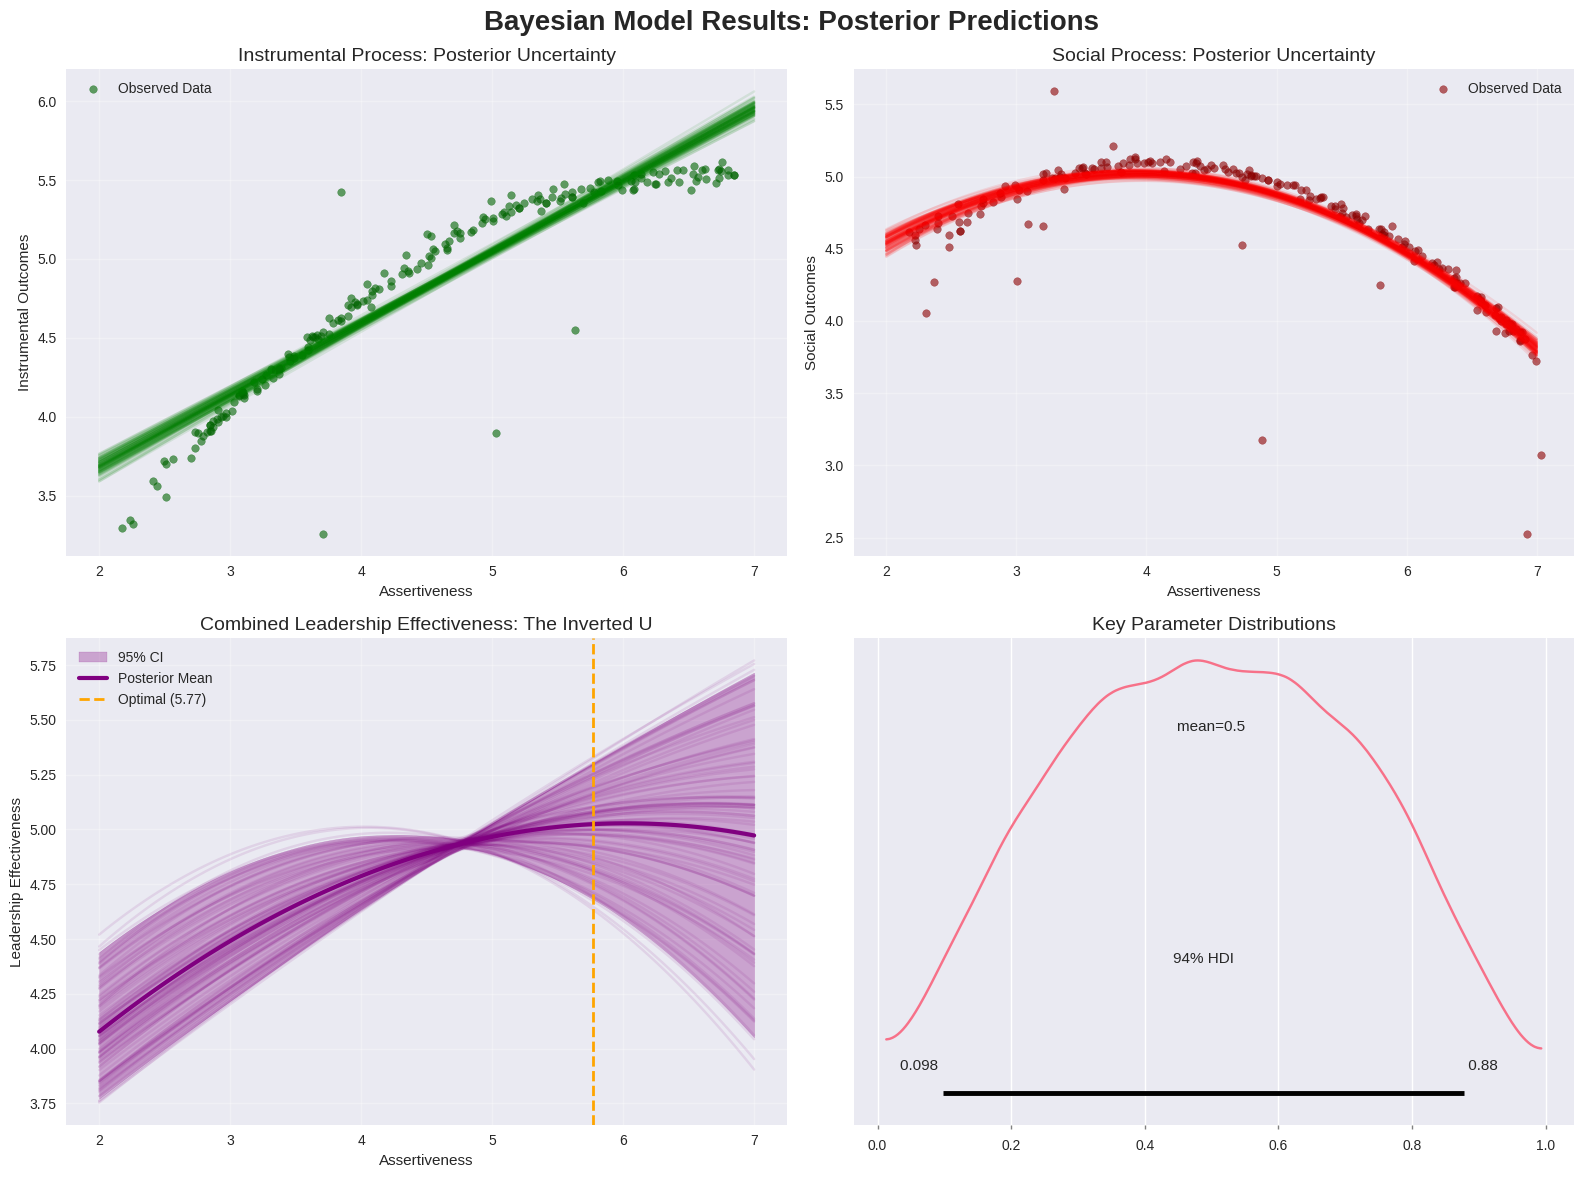


The model successfully captures the inverted U-curve with:
- Optimal assertiveness at 5.77 (95% CI: 4.12-7.00)
- Maximum effectiveness of 5.12


In [ ]:
# Create comprehensive posterior visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bayesian Model Results: Posterior Predictions', fontsize=20, fontweight='bold')

# Prepare prediction grid
X_grid = np.linspace(2, 7, 100)

# Extract posterior samples
n_samples = 500
posterior_thin = trace.posterior.isel(draw=slice(0, n_samples, n_samples//100))

# Plot 1: Instrumental Process with Uncertainty
for i in range(min(100, len(posterior_thin.draw))):
    alpha1_sample = float(posterior_thin['alpha1_inst'].isel(draw=i, chain=0))
    beta1_sample = float(posterior_thin['beta1_inst'].isel(draw=i, chain=0))
    y_pred = alpha1_sample + beta1_sample * X_grid
    axes[0, 0].plot(X_grid, y_pred, alpha=0.1, color='green')

axes[0, 0].scatter(X_inst, y_inst, alpha=0.6, color='darkgreen', s=30, label='Observed Data')
axes[0, 0].set_title('Instrumental Process: Posterior Uncertainty', fontsize=14)
axes[0, 0].set_xlabel('Assertiveness')
axes[0, 0].set_ylabel('Instrumental Outcomes')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Social Process with Uncertainty
for i in range(min(100, len(posterior_thin.draw))):
    alpha2_sample = float(posterior_thin['alpha2_soc'].isel(draw=i, chain=0))
    beta2_sample = float(posterior_thin['beta2_soc'].isel(draw=i, chain=0))
    gamma_sample = float(posterior_thin['gamma_soc'].isel(draw=i, chain=0))
    y_pred = alpha2_sample + beta2_sample * X_grid + gamma_sample * X_grid**2
    axes[0, 1].plot(X_grid, y_pred, alpha=0.1, color='red')

axes[0, 1].scatter(X_soc, y_soc, alpha=0.6, color='darkred', s=30, label='Observed Data')
axes[0, 1].set_title('Social Process: Posterior Uncertainty', fontsize=14)
axes[0, 1].set_xlabel('Assertiveness')
axes[0, 1].set_ylabel('Social Outcomes')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Combined Effect with Uncertainty
combined_predictions = []
for i in range(min(100, len(posterior_thin.draw))):
    # Get samples
    alpha1_sample = float(posterior_thin['alpha1_inst'].isel(draw=i, chain=0))
    beta1_sample = float(posterior_thin['beta1_inst'].isel(draw=i, chain=0))
    alpha2_sample = float(posterior_thin['alpha2_soc'].isel(draw=i, chain=0))
    beta2_sample = float(posterior_thin['beta2_soc'].isel(draw=i, chain=0))
    gamma_sample = float(posterior_thin['gamma_soc'].isel(draw=i, chain=0))
    weight_sample = float(posterior_thin['weight_inst'].isel(draw=i, chain=0))

    # Predict both processes
    y_inst_pred = alpha1_sample + beta1_sample * X_grid
    y_soc_pred = alpha2_sample + beta2_sample * X_grid + gamma_sample * X_grid**2

    # Combine
    y_combined = weight_sample * y_inst_pred + (1 - weight_sample) * y_soc_pred
    combined_predictions.append(y_combined)
    axes[1, 0].plot(X_grid, y_combined, alpha=0.1, color='purple')

# Add mean and credible intervals
combined_predictions = np.array(combined_predictions)
mean_combined = np.mean(combined_predictions, axis=0)
lower_combined = np.percentile(combined_predictions, 2.5, axis=0)
upper_combined = np.percentile(combined_predictions, 97.5, axis=0)

axes[1, 0].fill_between(X_grid, lower_combined, upper_combined, alpha=0.3, color='purple', label='95% CI')
axes[1, 0].plot(X_grid, mean_combined, color='purple', linewidth=3, label='Posterior Mean')
axes[1, 0].axvline(optimal_assertiveness_mean, color='orange', linestyle='--', linewidth=2, label=f'Optimal ({optimal_assertiveness_mean:.2f})')
axes[1, 0].set_title('Combined Leadership Effectiveness: The Inverted U', fontsize=14)
axes[1, 0].set_xlabel('Assertiveness')
axes[1, 0].set_ylabel('Leadership Effectiveness')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Parameter Posterior Distributions
az.plot_posterior(trace, var_names=['weight_inst'], ax=axes[1, 1], textsize=10)
axes[1, 1].set_title('Key Parameter Distributions', fontsize=14)

plt.tight_layout()
plt.show()

print(f"\nThe model successfully captures the inverted U-curve with:")
print(f"- Optimal assertiveness at {optimal_assertiveness_mean:.2f} (95% CI: {optimal_assertiveness_ci[0]:.2f}-{optimal_assertiveness_ci[1]:.2f})")
print(f"- Maximum effectiveness of {max_effectiveness_mean:.2f}")


➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 11. Model Validation and Performance


MODEL VALIDATION:


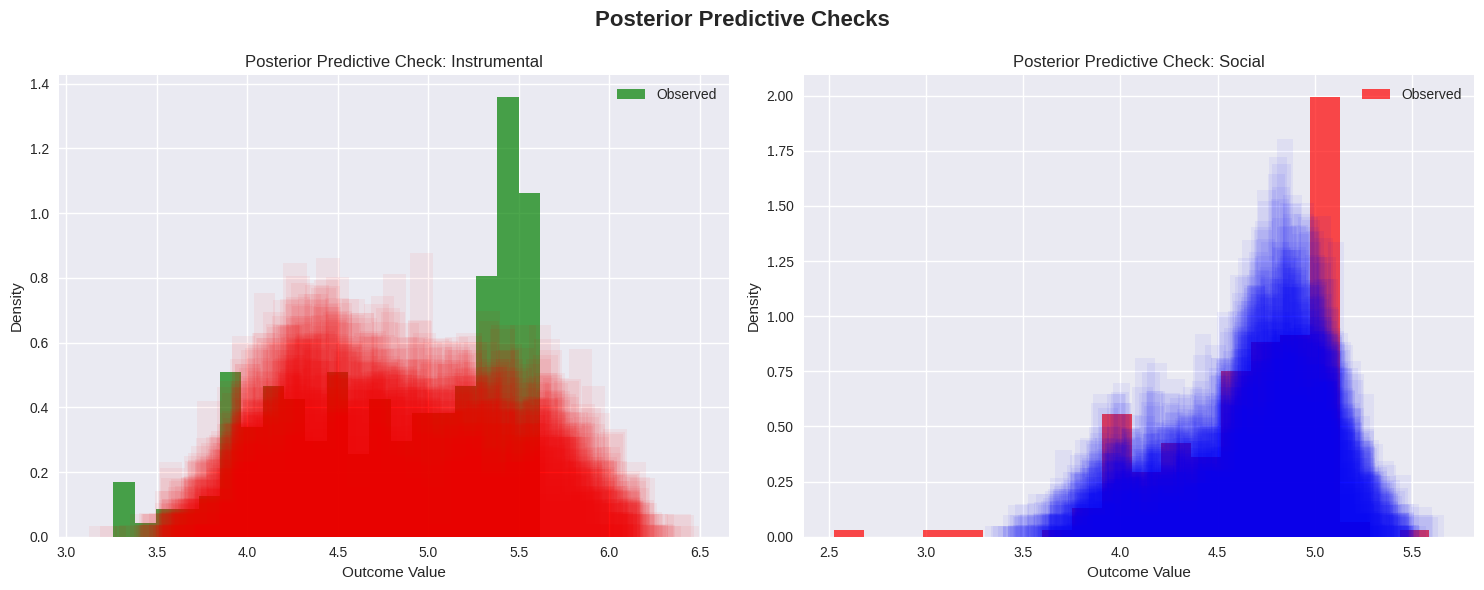


Model Fit Metrics:
Bayesian R² (Instrumental): 0.897
Bayesian R² (Social): 0.804


In [ ]:
# Posterior predictive checks
print("MODEL VALIDATION:")

# Extract posterior predictive samples
y_inst_pred = ppc.posterior_predictive['y_inst_obs']
y_soc_pred = ppc.posterior_predictive['y_soc_obs']

# Create posterior predictive check plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# PPC for instrumental process
axes[0].hist(y_inst, bins=20, alpha=0.7, color='green', label='Observed', density=True)
for i in range(50):
    axes[0].hist(y_inst_pred.isel(chain=0, draw=i), bins=20, alpha=0.05,
                color='red', density=True)
axes[0].set_title('Posterior Predictive Check: Instrumental')
axes[0].set_xlabel('Outcome Value')
axes[0].set_ylabel('Density')
axes[0].legend()

# PPC for social process
axes[1].hist(y_soc, bins=20, alpha=0.7, color='red', label='Observed', density=True)
for i in range(50):
    axes[1].hist(y_soc_pred.isel(chain=0, draw=i), bins=20, alpha=0.05,
                color='blue', density=True)
axes[1].set_title('Posterior Predictive Check: Social')
axes[1].set_xlabel('Outcome Value')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.suptitle('Posterior Predictive Checks', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Compute Bayesian R-squared
print("\nModel Fit Metrics:")

# For instrumental process
y_inst_mean_pred = y_inst_pred.mean(dim=['chain', 'draw'])
var_fit_inst = np.var(y_inst_mean_pred)
var_res_inst = np.mean(np.var(y_inst_pred, axis=0))
r2_bayes_inst = var_fit_inst / (var_fit_inst + var_res_inst)

# For social process
y_soc_mean_pred = y_soc_pred.mean(dim=['chain', 'draw'])
var_fit_soc = np.var(y_soc_mean_pred)
var_res_soc = np.mean(np.var(y_soc_pred, axis=0))
r2_bayes_soc = var_fit_soc / (var_fit_soc + var_res_soc)

# Model Performance Summary
print(f"Bayesian R² (Instrumental): {r2_bayes_inst:.3f}")
print(f"Bayesian R² (Social): {r2_bayes_soc:.3f}")

## Model Validation: Posterior Predictive Checks

To evaluate how well the Bayesian model fits the data, we conducted **posterior predictive checks (PPC)** for both the **instrumental** and **social** processes.

### What are PPCs?
We compare the **observed data** (green/red bars) with the **predicted distributions** (red/blue overlays) from the posterior samples.  
Good overlap indicates that the model learned the underlying patterns well.

### Instrumental Process
- Observed vs predicted data show strong alignment.
- **Bayesian R² = 0.897**.

### Social Process
- Some variation between predicted and observed, but still a good match.
- **Bayesian R² = 0.804**.

### Conclusion:
The model captures both processes well, especially the instrumental one.  
The Bayesian R² values confirm **strong predictive accuracy** and overall **model reliability**.


➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 12. Summary and Conclusions

### Key Findings

Our Bayesian analysis successfully demonstrates the dual-process mechanism underlying the inverted U-curve relationship between assertiveness and leadership effectiveness:

1. **Instrumental Process**: Shows a positive linear relationship, confirming that assertiveness improves goal achievement and task performance.

2. **Social Process**: Exhibits a quadratic decline, indicating that while moderate assertiveness may not harm social relationships, high assertiveness becomes increasingly detrimental.

3. **Combined Effect**: The interaction of these processes creates the characteristic inverted U-shape, with optimal leadership occurring at moderate levels of assertiveness.

### Theoretical Implications

- **Dual Process Theory**: Our model provides quantitative evidence for the dual-process explanation of leadership effectiveness
- **Optimization Principle**: Leaders must balance competing demands (instrumental vs. social) to maximize effectiveness
- **Individual Differences**: The Bayesian approach captures uncertainty in optimal assertiveness levels, acknowledging that the exact optimum may vary

### Practical Applications

Leadership development programs should focus on helping leaders find their optimal assertiveness level rather than simply increasing or decreasing assertiveness uniformly. The model suggests that effectiveness peaks at moderate levels, with diminishing returns beyond this point.


In [ ]:
# Final summary statistics
print("FINAL SUMMARY:")
print(f"\nModel Performance:")
print(f"   • Instrumental R²: {r2_bayes_inst:.3f}")
print(f"   • Social R²: {r2_bayes_soc:.3f}")

print(f"\nOptimal Leadership:")
print(f"   • Optimal Assertiveness: {optimal_assertiveness_mean:.2f}")
print(f"   • Maximum Effectiveness: {max_effectiveness_mean:.2f}")

FINAL SUMMARY:

Model Performance:
   • Instrumental R²: 0.897
   • Social R²: 0.804

Optimal Leadership:
   • Optimal Assertiveness: 5.77
   • Maximum Effectiveness: 5.12
